In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from sklearn.neighbors import LocalOutlierFactor
import seaborn as SB
from pyod.models.abod import ABOD
from sklearn.ensemble import IsolationForest

In [3]:
DF = pd.read_csv('../../datasets/heart_2020_cleaned.csv')
DF.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
X = DF[['BMI','PhysicalHealth','MentalHealth','SleepTime']]
XP = X.copy()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


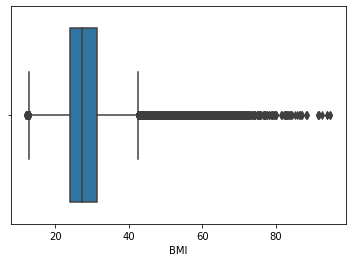

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


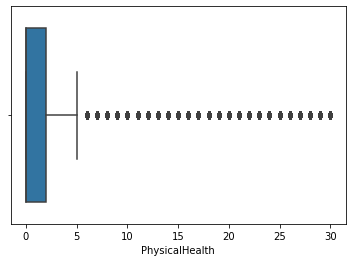

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


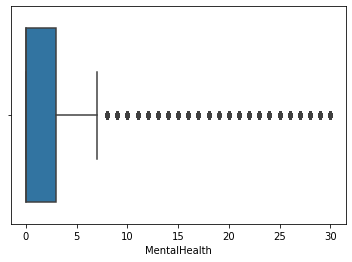

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


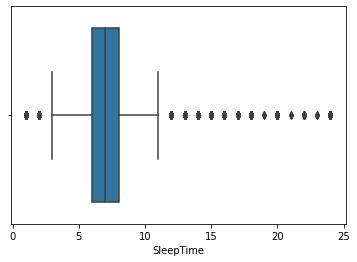

In [5]:
for c in X.columns:
    SB.boxplot(X[c])
    PLT.show()

# LOF (Local outlier factor)

In [6]:
# lof = LocalOutlierFactor(n_neighbors=100,contamination=.1)
lof = LocalOutlierFactor(n_neighbors=5)
Y_predit = lof.fit_predict(X)
XP['is_noise'] = Y_predit

In [7]:
XP['is_noise'].value_counts()

 1    286785
-1     33010
Name: is_noise, dtype: int64

In [8]:
noise_data = XP[XP['is_noise'] == -1]
noise_data.shape[0] / XP.shape[0] * 100

10.322237683516002

# ABOD

In [12]:
abod = ABOD(n_neighbors=5)
Y_predit = abod.fit_predict(X)
XP['is_noise'] = Y_predit

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
noise_data = XP[XP['is_noise'] == 1]
noise_data.shape[0] / XP.shape[0] * 100

0.0

# IsolationForest

In [46]:
isoforest = IsolationForest(n_estimators=3000,max_features=4)
Y_predit = isoforest.fit_predict(X)
XP['is_noise'] = Y_predit

In [47]:
noise_data = XP[XP['is_noise'] == -1]
noise_data.shape[0] / XP.shape[0] * 100

22.20078487781235

In [48]:
noise_data

,BMI,PhysicalHealth,MentalHealth,SleepTime,is_noise
0,16.60,3.0,30.0,5.0,-1
2,26.58,20.0,30.0,8.0,-1
4,23.71,28.0,0.0,8.0,-1
5,28.87,6.0,0.0,12.0,-1
6,21.63,15.0,0.0,4.0,-1
...,...,...,...,...,...
319774,20.36,30.0,0.0,8.0,-1
319779,23.38,30.0,0.0,5.0,-1
319782,31.89,30.0,30.0,4.0,-1
319787,36.54,7.0,0.0,9.0,-1
